## Lesson 8: (Popen) and NumPy and SciPy

Today's topics are:

1. subprocess
2. Numpy
3. Scipy


These three libraries are very useful for dealing with data files and analyzing them. 

### subprocess.Popen()

At this point, you have learned two different language - some UNIX and a lot of Python. In the future, you might learn some R or Java or C++! While the course is primarily focused on Python, why do we mention these other languages and introduce you to Unix as well? 

We do so because the types of software you encounter might be easier to use in one language or another. For instance, many software are actually written such that you can call the software from the Terminal using a number of options. Thus, without a GUI developed for the software, you might not know how to install or use the software. 

Other times, there might be a package of library that easily does everything you want. **R** is very handy for some default figures, as well as for phylogenetic analysis, and though modules like **DendroPy** might mean you can do equivalent analyses in Python, the history of using **R** means that other people's old code/packages you might want to use are in **R**. 

Sometimes, you might want to take one set of data, use Python to set up the initial data format, call a software from the Terminal to analyze said data, and then use Python to process the returned results and place the results in a figure. Doing each part separately means that you have to manually go from Python to software, and then software back to Python. Wouldn't it be easier if you could write a single script all in Python, and not have to watch your steps? You can!

The **subprocess** module allows us to be a bit more intelligent about how we execute system calls by using a method called **subprocess.Popen()**. This is somewhat different, however, in that the subprocess we want to execute must be created as an object, which we can then monitor with the methods of this object.


In [ ]:
import subprocess as sp
 
# open file to print to
pd="/Users/myang/YangLab/PythonBootcamp/Lesson8/"
fh = open('myUNIXcommands.txt', 'w')
 
# ls -l 10 times to garbage out
for each in range(0,2):
 a = sp.Popen( ['echo', 'hello'], stdout=fh ) ##pwd?
 a.wait()
fh.close()

In [ ]:
%%bash
pwd
cat myUNIXcommands.txt

Here, we are using Popen to run the command '**echo hello**' 2 times, and to store the results of each command (they'll all be the same) in a file called "myUNIXcommands.txt". We are just using **echo** as a simple example - you could run anything you could in the terminal using Popen.

The **wait()** method of the subprocess object tells the system to wait until this subprocess has completed before doing anything else in the program. If you're using your laptop for anything other than running your program, you may want to not grind everything to a halt for the duration of your program's runtime (which for me is often hours and hours). And if you're using a server to run your program on, your coworkers may appreciate it if you do not make use of every CPU on the server while they're trying to get their work done. In truth, the operating system will make its own attempt at balancing the needs of processes, but especially in the case where you're trying to use your laptop or PC as a workstation, this can save you some frustration.

The above example is useful - but what if you wanted to store the results in python' memory instead of writing it to a file?

In [ ]:
import subprocess as sp
 
proc = sp.Popen(['ls', '-l'], stdout=sp.PIPE) #, stderr=sp.PIPE)
# The sp.PIPE is a mechanism that allows the output to be redirected to
# wherever you point it. 
# In this case, to our subprocess object named "proc".
# The next step is to get the data out of the object and 
# into a data structure
# that we can organize however we see fit.
 
# we use the method below to get a tuple of two things: 
# the stdout and the stderr
proc_output = proc.communicate() ## Automatically includes **wait**, so do not need to add
print ("------------------------")
print ("We got a tuple\nWith the first part being:\n", proc_output[0], \
"\nand the second being:\n", proc_output[1])
print ("------------------------")
 
# Once we use the .communicate() method, the stdout 
# and stderr are gone from the proc object.
print ("------------------------")
print ("and if we don't format anything, we see the tuple like this:\n", proc_output)
print ("------------------------")
 
# But we could easily convert this into a friendlier structure
stdoutlist = proc_output[0].decode("utf-8").split('\n') 
##Note the output is in bytes - generally decoding to UTF-8 will work.
print ("------------------------")
print ("And now we see the first half of the tuple as a list of lines " \
+ "of output from our subprocess:\n")
for i in stdoutlist: print (i)
print ("------------------------")

In the above, we change the "stdout" to **subprocess.PIPE**, which refers to the "|" - remember in UNIX it held your results and applied the next function after it? Here, it holds the results in memory until you send it to a variable using the method **communicate** (which by default does the same thing as the method **wait**, so you won't need that here). Here, using **communicate**, the output is a tuple containing your *stdout* and your *stderr*, as you can see above. 

If we want to see any error messages, we add "stderr" and set it equal to **subprocess.PIPE**, like for "stdout". Then, any error messages will pop up in the second tuple. 

Lastly, note the `'.decode('utf-8')`. In Python 3, you need to specify the format the byte-string is in, which usually will be UTF-8. Adding this before using string operations (or re-initializing into a string) will avoid errors.

In [ ]:
import subprocess as sp
#pd="/Users/melyang/Desktop/PythonBootcamp2017/resources/"
for mychr in ['1','2']:
    mycommand="curl http://sgd-archive.yeastgenome.org/sequence/S288C_reference/chromosomes/fasta/chr0%s.fsa" % mychr
    proc = sp.Popen(mycommand.split(), stdout=sp.PIPE, stderr=sp.PIPE)
    myout = proc.communicate()
    myheader=myout[0].decode('utf-8').split('\n')[0]
    print (myheader)

In this last example, note that I use `curl` to download the file. `curl` reads everything in the file to PIPE here, so from the fasta file, I'm only grabbing the first line, which is the header in each case of the fasta file. 

### NumPy and SciPy

You have thus far learned about basics of python, as well as some plotting. However, you won't get very far without the ability to apply statistical analyses to the data you have parsed. 

Today, we will also learn about two very useful modules for conducting analyses: **numpy** and **scipy**. 

### Introduction

As Python matured into the multifunctional language it is today, more and more features were added. We've seen most of the original functionality of the language, which was originally intended for scripting of UNIX and web processes, and writing user interfaces. But as Python became popular as a scripting language, it found its way into the arms of scientists, who generally speaking, care more about efficient data manipulation than web programming. 

*The big piece that was missing in Python was a numerical library, which means a collection of tools for dealing with large amounts of numbers at once.* 

After a few efforts, an integrated one was developed. Numerical Python, or NumPy provided a large collection of mathematical functions similar to those found in a language like MATLAB or R, and also like those languages, Python provides datatypes that are can be manipulated as vectors and matrices. We'll introduce these data types, and then their associated functions.

## NumPy Basics
Numerical Python is a powerful library of functions, methods, and data types we can used to analyze our data. Unfortunately for those of us whose heads continue to spin in a crash-course of syntax, it also uses a different set of rules. I hope you'll understand why when you see the power and speed NumPy's data types afford us. Let's start off creating some empty arrays, which look sorta like **lists**, and are in fact **vectors** or **arrays**.

They differ in a few fundamental ways from lists:

1. Arrays cannot be of mixed types. They can be all integers, floats, strings, logical (or boolean) values, or other immutable values. But they cannot be some characters, some numbers, or any other mixture of data types. They also cannot contain mutable types such as lists. So, we can have a list of lists, but not an array of lists. We can, however, have an array of arrays (sortof). Which brings us to:
2. Arrays can be multidimensional, but they must be rectangular. You can have a list of lists, where the first interior list is 3 elements long, the second 5, and the third 12, but your multidimensional array must be expressible as "a m by n (by j by k by...) array". I have never encountered a situation where Python says there are too many dimensions (but I've never had need beyond, maybe, 4 dimensions).
3. We can perform vector operations on them, which can be algebraic functions (like a dot product), or simple replacements of values in slice of the array.

## Arrays
Here's one way of making an array: start with a list and turn it into an array with the array method:

In [ ]:
import numpy as np

a = [0] * 40
print(type(a))
print (a)
print ()

a = np.array(a)
print(type(a))
print (a)
print ()

A **numpy** function called **numpy.zeros()** is a better way of initializing an array with zeros. 

In [ ]:
a = np.zeros(40)
print(type(a))
print (a)
print ()

**numpy.arange()** creates a sequence much like **range()**, but as an array. Uncomment each one and print the resulting array. What do the different options for **numpy.arange()** do?

In [ ]:
a = np.arange(5,10)
#a = np.arange(5,10,dtype=float)
#a = np.arange(10)
#a = np.arange(10.0)
#a = np.arange(5,10,2)
#a = np.arange(5,10,0.25)
print (a)
print ()

You can also initialize an array with multiple dimensions.

In [ ]:
a = np.zeros((5,10)) ##tuple = (number rows, number columns)
print (a)
print ()

To work with specific elements in the array, you have two formats:

In [ ]:
a = np.zeros((5,10)) 
a[1][3]=5
a[-3][-2]=10

a[1,4]=6
a[-4,-2]=3
print (a)
print ()

What makes arrays exciting, however, is you can apply things to entire arrays, entire rows, or entire columns simultaneously!

In [ ]:
a = np.zeros((5,10)) 
a[1,:]=5
a[:,4]=10
print (a)

##What if you try this with [][]?

In a list, you would do the command below, which is many more steps!

In [ ]:
LoL = [[0 for i in range(10)] for i in range(5)] #LoL - List of Lists
 
for i, elem in enumerate(LoL[1]):
    LoL[1][i] = 5
    
for i,elem in enumerate(LoL):
    LoL[i][4] = 10
    
print (LoL)

You can also slice with arrays.

In [ ]:
a=np.arange(30)
a=a.reshape(5,6) 
print (a)
print ()
print (a[2:4,3:6])
print ()
print (a[::-1])
print ()
print (a[::2][1:4])

## Vector Math with Arrays
We can do math on many values at once with arrays, no for loop required!

In [ ]:
a=np.arange(30)
a=a.reshape(5,6)

b=np.arange(50)
b=b.reshape(5,10)

print (a)
print (b)
print ()

print ("Adding, a+10")
print (a+10)
print ()
print ("Subtracting, 20-b")
print (20-b)
print ()
print ("Dividing, b/5.0")
print (b/5.0)
print ()
print ("Multiplying b[:5,:6]*a")
print (b[:5,:6]*a)
print ()
print ("Transpose of a")
print (a.transpose())
print ()
print ("Dot product of a and b")
print (np.dot(a,b))
##What is wrong with the dot product? 

## Boolean (logical) Values with Arrays

In [ ]:
a = np.zeros(10, dtype=bool)
print (a)
print ()

print ("Slicing and mass-assignment still work")
a[2:5] = True
print (a)
print ()

print ("We can test if something is False or True, getting an array")
print (a)
print (a==False)
print ()



## Basic Statistics with Numpy

NumPy is freaking huge, with around 1200 pages of [reference documentation](https://numpy.org/doc/stable/contents.html), but all of you will, at some point, use some basic statistics to get a feel for your data. So let's make sure we hit some of those functions:

### Random distributions

In [ ]:
a = np.random.uniform(0, 100, 10) # Lower boundary, Upper boundary, Length of resulting array (number of random uniform numbers)
print (a)
print ()

a = np.random.uniform(0, 100, (5,2)) #Third argument can be array shape
print (a)
print ()

a = np.random.normal(0, 1, 10) ##Mean, standard deviation, number data points
print (a)
print ()

Let's doublecheck this using **matplotlib**! Look to see if you have a uniform distribution first. Then, uncomment the second `a` and see if you get a normal distribution. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.uniform(0, 1, 1000)
#a = np.random.normal(0, 1, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(a)
plt.show()

Let's get some summary statistics from these distributions.

In [ ]:
import numpy as np

a = np.random.uniform(0, 1, 1000)
b = np.random.normal(0, 1, 1000)

print ('Mean')
print (a.mean())
print (b.mean())
print ()
print ('Standard Deviation')
print (a.std())
print (b.std())
print ()
print ('Minimum')
print (a.min())
print (b.min())
print ()
print ('Maximum')
print (a.max())
print (b.max())

Let's go back to working with 2d arrays!

In [ ]:
a=np.arange(10)
a1=a.reshape(5,2) 
print ("Note that you can reshape your array.")
print (a)
print (a1)
print()

print ("You can also get a tuple of the dimensions of your array.")
print (a.shape) #If a dimension doesn't exist, then nothing is in that tuple.
print (a1.shape)
print ()

print ("What is happening in each case below?")
print (a1.sum())
print (a1.sum(axis=0))
print (a1.sum(axis=1))


### Why Numpy?
1. Avoid writing loops (don't re-invent the wheel)
2. **Efficient Computation**

Regarding the second point, numpy is useful because operations using it are many times faster than their pure Python implementations.  This is because numpy processes arrays using code written in 'low-level' languages like C or Fortran.  These languages are much more tedious to write programs in, but run much faster than a 'high-level' language like Python.  However, by using Python to call functions written by other people in low-level languages, you can get the best of both worlds.

**Quick performance comparison**

In [ ]:
%%time
N_ROWS = 10000;
N_COLS = 10000;
# Add 1 to every entry in the matrix
python_matrix = [[1 for i in range(N_COLS)] for i in range(N_ROWS)]
for i in range(N_ROWS):
    for j in range(N_COLS):
        python_matrix[i][j] += 1

In [ ]:
%%time
N_ROWS = 10000;
N_COLS = 10000;
numpy_matrix = np.zeros((N_ROWS , N_COLS ));
numpy_matrix += 1;

Because **numpy** is able to know that everything is going to be a float, it can do a lot of optimizations to the arrays that it wouldn't be able to do if each element could, conceivably be a different type. Furthermore, a lot of the time is spent checking to make sure i and j aren't too big or small for the size of the lists, while the numpy code just loads the size of the array once and never checks again.

## SciPy and Fitting

SciPy (pronounced "Sigh Pie") is a collection of libraries that builds on NumPy, and has lots of convenient, fast functions for working with large amounts of scientific data. It's slightly smaller than NumPy, with only 900-odd pages of documentation. That includes sections on integrating C or Fortran code into Python, which is way outside the scope of this course, but if you ever do get to the point where you need a super-efficient implementation of something, you're covered. Especially in the one-off nature of academic science, you're often better served spending less time writing code that takes longer to run, compared to spending lots and lots of time writing code that runs slightly faster.

The [stats](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) module of SciPy has functions for even more statistical distributions, statistical tests, and other assorted functions that a good statistician might need. As an example, let's see how we might use the [linregress](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) function, which does a linear regression on some data. Linear regression is the process of finding a line that minimizes the sum of the square of the vertical distances from each point to the line.

First, we'll set up some noisy data:

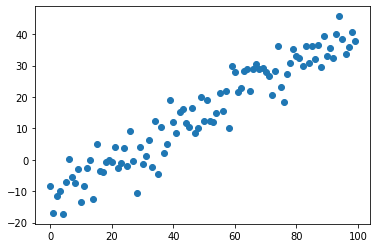

In [2]:
import numpy as np

slope = 0.5
intercept = -10

x = np.arange(0, 100)
y = slope*x + intercept
noise = 5 * np.random.randn(len(x))

y = y + noise

# Plot the line 
import matplotlib.pyplot as plt
plt.plot(y,'o')

However, using a bit of linear algebra, we can actually compute the best fit linear coefficients

0.5364430091195438 -11.80038014227441 0.9541281535258852


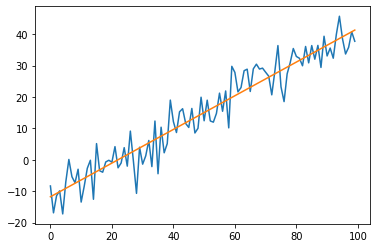

In [3]:
n = len(x)

m = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x**2) - (sum(x))**2)
b = (sum(y) - m * sum(x))/n
r = (n * sum(x * y) - sum(x) * sum(y)) / np.sqrt((n*sum(x**2) - sum(x)**2)
* (n * sum(y**2) - sum(y)**2))
 
print (m, b, r)

y2 = m*x + b
plt.plot(x,y)
plt.plot(x,y2)

This gives us pretty much the right result, but it was kind of a pain to type in. If only the libraries had some sort of function that could do linear regression for us...

In [6]:
from scipy import stats
#stats.linregress??
r_slope, r_int, r_rval, r_pval, r_stderr = stats.linregress(x, y)
 
print ("Regression Slope: ", r_slope)
print ("Regression Intercept: ", r_int)
print ("Regression correlation: ", r_rval)
print ("R^2:, ", r_rval**2)
print ("p(slope is 0): ", r_pval)

Regression Slope:  0.5364430091195438
Regression Intercept:  -11.800380142274411
Regression correlation:  0.954128153525885
R^2:,  0.9103605333507148
p(slope is 0):  3.959585792395617e-53


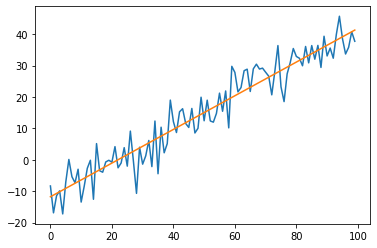

In [8]:
y3 = r_slope*x + r_int
plt.plot(x,y)
plt.plot(x,y3)

Thus, with **scipy**, it is a lot easier to calculate the regression!

One other function that you might find useful is the **corrcoef** function, which gives you a correlation matrix between two data sets. For two 1-D sets like we have (x and y), this will give a 2x2 matrix.


In [9]:
np.corrcoef(x,y)

array([[1.        , 0.95412815],
       [0.95412815, 1.        ]])